This post is my first note on Autoencoders. I will show here implementation of simple undercoplete autoencoder in Tensorflow and show results using [the iris dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

The purpose of that autoencoder is to act as PCA (Principal Component Analysis, refer to [Sebastian Raschka post]() for great discussion on PCA topic and more).

In the code below I show how simply it can by to experiment with basic Autoencoder as we have easy access to dataset through Sklearn.

Shortly ther are types of Autoencoders [overview link](http://machinelearninguru.com/deep_learning/tensorflow/neural_networks/autoencoder/autoencoder.html):
 * Undercomplete autoencoders
 * Regularized:
     - Sparse autoencoders [link](https://web.stanford.edu/class/cs294a/sparseAutoencoder.pdf)
     - Denoising Autoencoders (DAE)
     - Contractive Autoencoders (CAE)
 * Variational Autoencoders 

Reference to Tensorflow [all symbols](https://www.tensorflow.org/api_docs/python/) - someitmes it helps to have a quick look into such a place once you got lost while working with TensorFlow low level API. Recommended :)

Non obvoius references:
* [Hands-On Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do)
* [CS294A Lectuter Notes of Andrew Ng](https://web.stanford.edu/class/cs294a/sparseAutoencoder.pdf)
* Sebastian Raschka [post on PCA](http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/dimensionality_reduction/projection/principal_component_analysis.ipynb)
* My note on [foundation on backpropagation](https://dkolmas.github.io/blog/2017/11/09/Foundation-of-backpropagation) if you want to know how NN works

In [40]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline

In [41]:
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  1.8.0


In [42]:
iris = datasets.load_iris()
print("iris dataset content: ",list(iris.keys()))
print("A shape of data content of iris dataset:", iris["data"].shape)

iris dataset content:  ['data', 'target', 'target_names', 'DESCR', 'feature_names']
A shape of data content of iris dataset: (150, 4)


Highlights about dataset:
* Total number of samples is 150
* The iris data consiste of 4 inputs (features): Sepal Length, Sepal Width, Petal Length and Petal Width
* More informatin of iris data set in [here](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
* For this Autoencoder all there features are considered
* This simple Auteocnoder is supposed to deliver PCA
* The outcome of Autoencoder can be checked against regular PCA of iris dataset presetned by Sebastian Raschka in his [notebook](http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/dimensionality_reduction/projection/principal_component_analysis.ipynb)


In [43]:
print("Example of input sample: ",iris['data'][3,:])

Example of input sample:  [4.6 3.1 1.5 0.2]


In [44]:
X_train = iris['data']
y = iris['target']  # for visualization purpose only
type(X_train)

numpy.ndarray

Now, let's build the tensorflow code for simple autoencoder. As a help you can refer to that figure which was taken from [CS294A Lectuter Notes of Andrew Ng](https://web.stanford.edu/class/cs294a/sparseAutoencoder.pdf)

<img src="Autoencoder_basic_01.png">

To build the network of the architecture type shown above we can:
* use separate weigths and biases definition as it is [here](https://www.tensorflow.org/versions/r1.0/get_started/mnist/mechanics) end perform operation like: W*X+b
* use dense layer (fully connected layer) definition as it is [here](https://www.tensorflow.org/api_docs/python/tf/layers/dense)

In [45]:
n_input = 4
n_hidden = 2
n_output = n_input

In [46]:
tf.reset_default_graph()  # To avoid many duplicated nodes in the default grpah
sess = tf.Session()       # The graph is created when new session starts

NOTE

In orderto performe PCA using Autoencoder it is necessary to desing your NN so that:
 * all activations functions are linear - in [tf.layer.dense](https://www.tensorflow.org/api_docs/python/tf/layers/dense) "activation" parameter is set to lienar activation function by default
 * 

In [47]:
X = tf.placeholder(tf.float32, shape=[None, n_input], name='Input')
L_hidden = tf.layers.dense(X, n_hidden, name='LayerHidden')
Output = tf.layers.dense(L_hidden, n_output, name='Output')

Znajdz strone www na ktorej byla mowa o prostym aoutoencoderze, ktory morze pelnic role PCA

Znlazełe. [Tutaj](https://github.com/ageron/handson-ml/blob/master/15_autoencoders.ipynb)

In [48]:
learning_rate = 0.01
tf.set_random_seed(100)

AE_loss = tf.reduce_mean(tf.square(Output - X))
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(AE_loss)

init = tf.global_variables_initializer()

In [49]:
n_iterations = 1000
codings = L_hidden

with tf.Session() as sess:
    tf.set_random_seed(100)
    init.run()
    for iteration in range(n_iterations):
        training_op.run(feed_dict={X: X_train})
    codings_val = codings.eval(feed_dict={X: X_train})

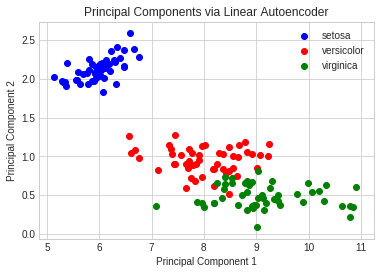

In [51]:
with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(6,4))
    for lab, col in zip((0, 1, 2), ('blue', 'red', 'green')):

        plt.scatter(codings_val[y==lab, 1],
                    codings_val[y==lab, 0],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title("Principal Components via Linear Autoencoder")
    plt.legend(iris['target_names'])
    plt.show()
